## About Data: 
#### Where the data comes from:
- Country Codes with Continent https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c 
- Minimized Data 1960-2050 https://databank.worldbank.org/reports.aspx?source=Health%20Nutrition%20and%20Population%20Statistics%3A%20Population%20estimates%20and%20projections

Here all countries and times were selected however when considering the series
we removed the % based data of the population for males and females. This is due
to the download limitations of the csv file cells on their website.

## Linear Regression
Steps:
 1. dummy variable encode categorical
 2. run PCA
 3. split data
 4. fit model

## objective of model


In [47]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import pycountry

In [48]:
# load data
pop_data = pd.read_csv('../Datasets/Population Data 1960-2050.csv', low_memory=False)
pop_data = pop_data.replace('..', np.nan)
pop_data = pop_data.iloc[: , 1:] 

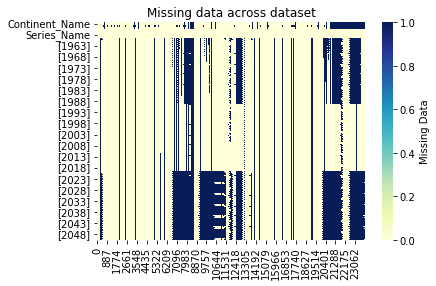

In [49]:
# missing data check
plt.figure()
sns.heatmap(pop_data.isnull().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.title("Missing data across dataset")
plt.show()

In [50]:
# add country code
#list of country codes
country_codes = []
country_names = []
for country in pycountry.countries:
    country_codes.append(country.alpha_3)
    country_names.append(country.name)
country_codes.sort(key=str.lower)
country_names.sort(key=str.lower)

country_data = pop_data[pop_data.Country_Code.isin(country_codes)]
non_country_data = pop_data[~pop_data.Country_Code.isin(country_codes)]
non_country_data = non_country_data.iloc[: , 3:] # Removing Continent Codes for non-Nations (Will be NA anyway)

In [51]:
pop_total = country_data[country_data.Series_Code == "SP.POP.TOTL"] #Population Totals
pop_total.head()

,Continent_Name,Continent_Code,Country_Number,Country_Name,Country_Code,Series_Name,Series_Code,[1960],[1961],[1962],...,[2041],[2042],[2043],[2044],[2045],[2046],[2047],[2048],[2049],[2050]
62,Asia,AS,4.0,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967,9169406,9351442,...,57748000,58574000,59387000,60188000,60974000,61746000,62503000,63245000,63972000,64683000
152,Europe,EU,8.0,Albania,ALB,"Population, total",SP.POP.TOTL,1608800,1659800,1711319,...,2571000,2550000,2529000,2508000,2486000,2465000,2443000,2421000,2399000,2377000
242,Africa,AF,12.0,Algeria,DZA,"Population, total",SP.POP.TOTL,11057864,11336336,11619828,...,56174000,56711000,57250000,57789000,58326000,58859000,59388000,59911000,60423000,60923000
332,Oceania,OC,16.0,American Samoa,ASM,"Population, total",SP.POP.TOTL,20127,20605,21246,...,54000,54000,54000,54000,54000,54000,54000,54000,54000,54000
422,Europe,EU,20.0,Andorra,AND,"Population, total",SP.POP.TOTL,13410,14378,15379,...,78000,78000,78000,77000,77000,77000,77000,77000,76000,76000


In [52]:
#remove unwanted columns
pop_total = pop_total.drop(['Continent_Code', 'Country_Number','Country_Code','Series_Name','Series_Code'], axis=1)
pop_total =  pop_total.drop(pop_total.columns[63:],axis=1)

In [53]:
#fix column names - years
pop_total.columns = pop_total.columns.str.strip("[]")

In [61]:
pd.get_dummies(pop_total, columns=['Continent_Name','Country_Name'])

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,Country_Name_Uruguay,Country_Name_Uzbekistan,Country_Name_Vanuatu,"Country_Name_Venezuela, RB",Country_Name_Vietnam,Country_Name_Virgin Islands (U.S.),Country_Name_West Bank and Gaza,"Country_Name_Yemen, Rep.",Country_Name_Zambia,Country_Name_Zimbabwe
62,8996967,9169406,9351442,9543200,9744772,9956318,10174840,10399936,10637064,10893772,...,0,0,0,0,0,0,0,0,0,0
152,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,2081695,...,0,0,0,0,0,0,0,0,0,0
242,11057864,11336336,11619828,11912800,12221675,12550880,12902626,13275020,13663581,14061724,...,0,0,0,0,0,0,0,0,0,0
332,20127,20605,21246,22029,22850,23675,24473,25235,25980,26698,...,0,0,0,0,0,0,0,0,0,0
422,13410,14378,15379,16407,17466,18542,19646,20760,21886,23053,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20402,32500,34300,35000,39800,40800,43500,46200,49100,55700,60300,...,0,0,0,0,0,1,0,0,0,0
20492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
20672,5315351,5393034,5473671,5556767,5641598,5727745,5816241,5907873,6001858,6097042,...,0,0,0,0,0,0,0,1,0,0
20762,3070780,3164330,3260645,3360099,3463211,3570466,3681953,3797877,3918872,4045740,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# outliers check

In [ ]:
# visualize data

In [ ]:
# other check on data if required

In [ ]:
# PCA

In [ ]:
# split data

In [ ]:
# train model

In [ ]:
# test

In [ ]:
# validation

In [ ]:
# predict

In [ ]:
# conclusion